In [10]:
pip install pipreqs

  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13822 sha256=3cc648e71c8b3165bdcf037e5296e0799e7a76b7f3c9cca66f98feaa877112ba
  Stored in directory: c:\users\kailash\appdata\local\pip\cache\wheels\0b\1d\03\175286677fb5a1341cc3e4755bf8ec0ed08f3329afd67446b0
Successfully built docopt
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import time, enum
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector

ModuleNotFoundError: No module named 'mesa.time'

In [8]:
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, GeoJSONDataSource, ColorBar, HoverTool, Legend, LinearColorMapper, ColorBar
from bokeh.plotting import figure
from bokeh.palettes import brewer
from bokeh.models.glyphs import Line
from bokeh.palettes import Category10, Viridis
output_notebook()
import panel as pn
import panel.widgets as pnw
pn.extension()

Loading BokehJS ...

ModuleNotFoundError: No module named 'panel'

In [3]:
#importing data
Inf = pd.read_excel("Positive_Cases-Nov,Dec,Jan.xlsx")
Vax = pd.read_excel("Vaccinated-Nov,Dec,Jan.xlsx")


In [4]:
Inf.head()

,SI.No,District,2021-11-01 00:00:00,2021-11-02 00:00:00,2021-11-03 00:00:00,2021-11-04 00:00:00,2021-11-05 00:00:00,2021-11-06 00:00:00,2021-11-07 00:00:00,2021-11-08 00:00:00,...,2022-01-23 00:00:00,2022-01-24 00:00:00,2022-01-25 00:00:00,2022-01-26 00:00:00,2022-01-27 00:00:00,2022-01-28 00:00:00,2022-01-29 00:00:00,2022-01-30 00:00:00,2022-01-31 00:00:00,The_Average
0,1,Ariyalur,24,23,24,21,22,21,24,25,...,177,42,41,63,61,42,41,42,42,33.0
1,2,Chengalpattu,90,89,87,88,85,84,81,79,...,1841,172,211,280,353,172,211,172,172,131.0
2,3,Chennai,158,156,152,159,153,169,176,173,...,6383,685,977,1129,1613,685,977,685,685,421.5
3,4,Coimbatore,168,165,160,158,153,150,147,145,...,3912,259,204,383,325,259,204,259,259,213.5
4,5,Cuddalore,219,218,221,220,218,216,215,216,...,352,417,413,625,617,417,413,417,417,318.0


In [5]:
Vax.head()

,S.No,Health Unit District,2021-01-11 00:00:00,2021-02-11 00:00:00,2021-03-11 00:00:00,2021-04-11 00:00:00,2021-05-11 00:00:00,2021-06-11 00:00:00,2021-07-11 00:00:00,2021-08-11 00:00:00,...,24/1/22,25/1/22,26/1/22,27/1/22,28/1/22,29/1/22,30/1/22,31/1/22,Mean of the District,Rate of Vaccination
0,1,Aranthangi,518,528,288,0,115,1913,765,2582,...,1669,1731,112,2930,1486,11497,0,1179,4031.022472,40.310225
1,2,Ariyalur,412,310,112,0,401,2615,141,1056,...,2584,2525,2275,2794,2603,15186,608,2634,5293.011236,52.930112
2,3,Attur,1841,463,821,0,290,1603,10,812,...,1925,1401,362,1613,848,11888,259,1245,6245.910112,62.459101
3,4,Chengalpet,6815,1837,1109,91,1941,6305,1057,989,...,6567,5626,3165,5262,3920,23554,1556,3491,10826.168539,108.261685
4,5,Chennai,6038,5283,2112,260,2022,9067,1454,2871,...,9911,9821,3261,27635,7464,108925,1410,4632,28570.325843,285.703258


In [4]:
District = input("Enter District: ")
inf_df = Inf[Inf.columns[-1]].where(Inf['District'] == District).dropna()
inf_df = inf_df.iloc[0]
inf_df = "{:.2f}".format(inf_df)
print(inf_df) 

Enter District: Ariyalur
33.00


In [5]:
Health_Unit = input("Enter District: ")
vax_df = Vax['Rate of Vaccination'].where(Vax['Health Unit District'] == Health_Unit).dropna()
vax_df = vax_df.iloc[0]
vax_df = "{:.2f}".format(vax_df)
print(vax_df)

Enter District: Ariyalur
52.93


In [6]:
class State(enum.IntEnum):
    SUSCEPTIBLE = 0
    INFECTED = 1
    IMMUNIZED = 2
    REMOVED = 3
    

In [7]:
#Agent Class
class MyAgent(Agent):
    """ An agent in an epidemic model."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.age = self.random.normalvariate(20,40)        
        self.state = State.SUSCEPTIBLE  
        self.infection_time = 0
        self.infection_rate= 0
        self.aware_rate= 0
        self.immunization_time=0

    def move(self):
        """Move the agent"""

        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def status(self):
        if self.state == State.INFECTED:     
            drate = self.model.death_rate
            alive = np.random.choice([0,1], p=[drate,1-drate])
            if alive == 0:
                self.model.schedule.remove(self)            
            t = self.model.schedule.time-self.infection_time
            if t >= self.recovery_time:          
                self.state = State.REMOVED
            

    def contact(self):
        
        
        cellmates = self.model.grid.get_cell_list_contents([self.pos])       
        if len(cellmates) > 1:
            
            for other in cellmates:
                              
                if self.random.random() > model.ptrans:
                    continue
                #infection1
                if self.state is State.SUSCEPTIBLE and other.state is State.INFECTED:
                    self.infection_rate += 1.8
                    if self.infection_rate >= model.infection_th:
                        self.state = State.INFECTED
                        self.infection_time = self.model.schedule.time
                        self.recovery_time = model.get_recovery_time()
                #infection2
                if self.state is State.IMMUNIZED and other.state is State.INFECTED:
                    self.infection_rate += 1
                    if self.infection_rate >= model.infection_th:
                        self.state = State.INFECTED
                        self.infection_time = self.model.schedule.time
                        self.recovery_time = model.get_recovery_time()
                #immunization
                if self.state is State.SUSCEPTIBLE and other.state is State.IMMUNIZED:
                    self.aware_rate += 1.5
                    if self.aware_rate >= model.aware_th:
                        self.state = State.IMMUNIZED
                        self.immunization_time = self.model.schedule.time
                        other.immunization_time = model.get_aware_time()
                    
                
    def step(self):
        self.status()
        self.move()
        self.contact()


In [8]:
#Model Class
class GridInfectionModel(Model):
    """A model for infection spread."""
    
    def __init__(self, N=10, width=10, height=10, ptrans=0.5, 
                 progression_period=3, progression_sd=2,death_rate=0.0193, recovery_days=14,
                 recovery_sd=7,aware_th=5,infection_th=4,aware_days=10,aware_sd=4):
        
        self.num_agents = N
        self.initial_outbreak_size = 1
        self.recovery_days = recovery_days
        self.recovery_sd = recovery_sd
        self.aware_days = aware_days
        self.aware_sd = aware_sd
        self.ptrans = ptrans
        self.death_rate = death_rate
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        self.running = True
        self.dead_agents = []
        self.immunized_agents = []
        self.aware_th = aware_th
        self.infection_th=infection_th
        # Create agents
        for i in range(self.num_agents):
            a = MyAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))
            #make some agents infected at start
            infected = np.random.choice([0,1], p=[0.98,0.02])
            if infected == 1:
                a.state = State.INFECTED
                a.recovery_time = self.get_recovery_time()
            #make some agents immunized when infection is at peak
            immunized = np.random.choice([0,1],p=[0.99,0.01])
            if immunized == 1:
                a.state= State.IMMUNIZED
                a.aware_time = self.get_aware_time()
        self.datacollector = DataCollector( 
            agent_reporters={"State": "state"})

    def get_recovery_time(self):
        return int(self.random.normalvariate(self.recovery_days,self.recovery_sd))
    def get_aware_time(self):
        return int(self.random.normalvariate(self.aware_days,self.aware_sd))
    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

In [9]:
def get_column_data(model):
    #pivot the model dataframe to get states count at each step
    agent_state = model.datacollector.get_agent_vars_dataframe()
    X = pd.pivot_table(agent_state.reset_index(),index='Step',columns='State',aggfunc=np.size,fill_value=0)    
    labels = ['Susceptible','Infected','Immunized','Removed']
    X.columns = labels[:len(X.columns)]
    return X
    
def plot_states(model,ax):    
    steps = model.schedule.steps
    X = get_column_data(model)
    X.plot(ax=ax,lw=3,alpha=0.8)

1.556314468383789
      Susceptible  Infected  Immunized  Removed
Step                                           
0             292         5          3        0
1             292         5          3        0
2             292         5          3        0
3             292         5          3        0
4             292         4          3        0
...           ...       ...        ...      ...
595             1         0          3      228
596             1         0          3      228
597             1         1          2      228
598             1         1          2      228
599             1         1          2      228

[600 rows x 4 columns]


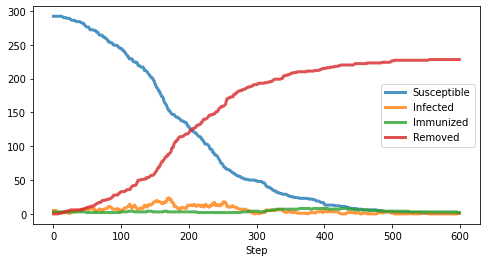

In [10]:
pop=300
steps=600
st=time.time()
model = GridInfectionModel(pop, 30, 30, ptrans=1.50)
for i in range(steps):
    model.step()
print (time.time()-st)
agent_state = model.datacollector.get_agent_vars_dataframe()
print (get_column_data(model))

f,ax=plt.subplots(1,1,figsize=(8,4))
plot_states(model,ax)

In [11]:
#Live using Bokeh
model = GridInfectionModel()#pop, 30, 30, ptrans=1.50

def grid_values(model):
    """Get grid states"""
    
    agent_counts = np.zeros((model.grid.width, model.grid.height))
    for cell in model.grid.coord_iter():
        agents, x, y = cell
        c=None
        for a in agents:
            c = a.state
        agent_counts[x,y] = c
    df=pd.DataFrame(agent_counts)  
    return df

st=time.time()
x=grid_values(model)
print (time.time()-st)

0.000995635986328125


In [12]:
def plot_cells_bokeh(model):
    """Plot model grid values as a grid"""
    
    agent_counts = np.zeros((model.grid.width, model.grid.height))
    w=model.grid.width
    df=grid_values(model) 
    df = pd.DataFrame(df.stack(), columns=['value']).reset_index()    
    columns = ['value']
    x = [(i, "@%s" %i) for i in columns]    
    hover = HoverTool(
        tooltips=x, point_policy='follow_mouse')
    colors = Category10[4]
    mapper = LinearColorMapper(palette=colors, low=df.value.min(), high=df.value.max())
    p = figure(plot_width=500,plot_height=500, tools=[hover], x_range=(-1,w), y_range=(-1,w))
    p.rect(x="level_0", y="level_1", width=1, height=1,
       source=df,
       fill_color={'field':'value', 'transform': mapper},
       line_color='black')
    p.background_fill_color = "black"
    p.grid.grid_line_color = None    
    p.axis.axis_line_color = None
    p.toolbar.logo = None
    return p

p=plot_cells_bokeh(model)
pn.pane.Bokeh(p)

Bokeh(Figure)

In [13]:
def plot_states_bokeh(model,title=''):
    
        
    X = get_column_data(model)
    X = X.reset_index()
    source = ColumnDataSource(X)
    i=0
    colors = Category10[4]
    items=[]
    p = figure(plot_width=600,plot_height=400,tools=[],title=title,x_range=(0,100))        
    for c in X.columns[1:]:
        line = Line(x='Step',y=c, line_color=colors[i],line_width=4,line_alpha=.4,name=c)
        glyph = p.add_glyph(source, line)
        i+=1
        items.append((c,[glyph]))

    p.xaxis.axis_label = 'Step'
    p.add_layout(Legend(location='center_right',   
                items=items))
    p.background_fill_color = "#e1e1ea"
    p.background_fill_alpha = 0.5
    p.legend.label_text_font_size = "10pt"
    p.title.text_font_size = "15pt"
    p.toolbar.logo = None
    p.sizing_mode = 'scale_height'    
    return p

p = plot_states_bokeh(model)
#pn.pane.Bokeh(p)

In [14]:
plot_pane = pn.pane.Bokeh()
grid_pane = pn.pane.Bokeh()
pn.Row(plot_pane,grid_pane,sizing_mode='stretch_width')

Row(sizing_mode='stretch_width')
    [0] Bokeh(None)
    [1] Bokeh(None)

Infection Rate => Enter District: Ariyalur
Vaccination Rate => Enter Health Unit District: Ariyalur
Enter number of people: 500
Enter number of steps: 500
434.14528632164
      Susceptible  Infected  Immunized  Removed
Step                                           
0             483        10          7        0
1             483         9          7        1
2             483         9          7        1
3             483         8          7        1
4             483         7          7        1
...           ...       ...        ...      ...
995            53         2        396       30
996            51         2        398       30
997            51         1        398       31
998            49         1        400       31
999            49         1        400       31

[1000 rows x 4 columns]


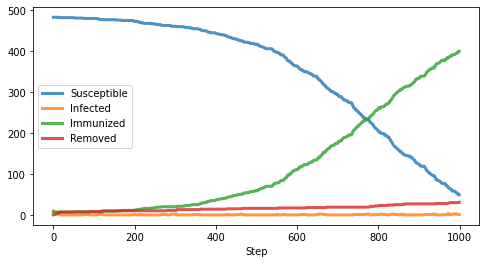

In [15]:

st=time.time()

District = input("Infection Rate => Enter District: ")
inf_df = Inf[Inf.columns[-1]].where(Inf['District'] == District).dropna()
inf_df = inf_df.iloc[0]
#inf_df = "{:.2f}".format(inf_df)

Health_Unit = input("Vaccination Rate => Enter Health Unit District: ")
vax_df = Vax['Rate of Vaccination'].where(Vax['Health Unit District'] == Health_Unit).dropna()
vax_df = vax_df.iloc[0]
#vax_df = "{:.2f}".format(vax_df)

pop=int(input("Enter number of people: "))
steps=int(input("Enter number of steps: "))

model = GridInfectionModel(pop, 100, 100, ptrans=inf_df,aware_sd=vax_df)
for i in range(steps):
    model.step()    
    p1=plot_states_bokeh(model,title='step=%s' %i)
    plot_pane.object = p1
    p2=plot_cells_bokeh(model)
    grid_pane.object = p2
    time.sleep(0.5)

for i in range(steps):
    model.step()
print (time.time()-st)
agent_state = model.datacollector.get_agent_vars_dataframe()
print (get_column_data(model))

f,ax=plt.subplots(1,1,figsize=(8,4))
plot_states(model,ax)
plt.savefig('SIRZ.png',dpi=200)